In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import geopandas

In [27]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
# 지도 데이터 분석 라이브러리
import fiona
import geopandas
import shapely.wkt # geometry type으로 변경해주는 라이브러리

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 웹크롤링을 위한 라이브러리
import requests
import lxml
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time

In [29]:
import sys

print("--sys.version—")
print(sys.version)

--sys.version—
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [30]:
material = geopandas.read_file('./merge_6.geojson', encoding='utf-8')
material = material[['geometry', '인구수', '건축물수', '주차장수', '주유소', '주차구획수', '교통량', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

material.head()

,geometry,인구수,건축물수,주차장수,주유소,주차구획수,교통량,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",27,4,0,0,0,0.0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",0,3,0,0,0,0.0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",27,20,0,0,0,0.0,0,0,0,0,0,0,0,0,0


# material 데이터 알고리즘 적용

In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data = material[material.columns[1:-1]]
target = material['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

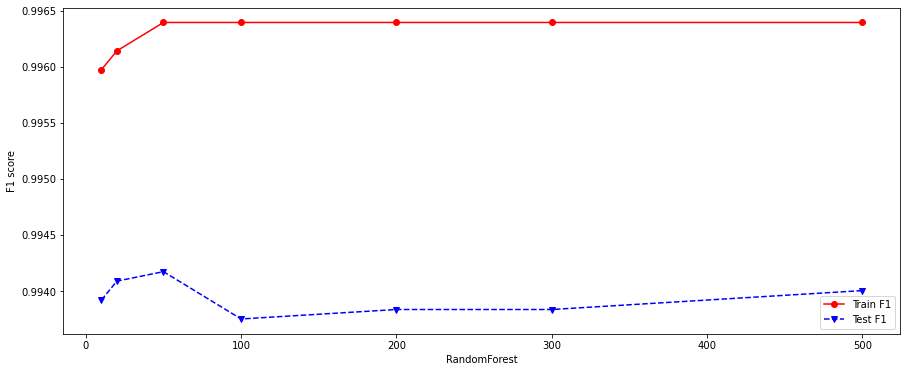

In [76]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [77]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 219
train_set에서 충전소가 없는 곳 : 35328
충전소가 있다고 정확히 분류 : 92
충전소가 없는데 있다고 분류 : 1
충전소가 있는데 없다고 분류 : 127

test_set 에서 충전소가 있는 곳 : 57
test_set에서 충전소가 없는 곳 : 11792
충전소가 있다고 정확히 분류 : 4
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 53


estimators = 1
충전소가 없는데 있다고 분류 : 130
충전소가 있는데 없다고 분류 : 178 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 50
충전소가 있는데 없다고 분류 : 214 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 60
충전소가 있는데 없다고 분류 : 168 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 61
충전소가 있는데 없다고 분류 : 184 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 46
충전소가 있는데 없다고 분류 : 168 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 52
충전소가 있는데 없다고 분류 : 180 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 66
충전소가 있는데 없다고 분류 : 160 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 40
충전소가 있는데 없다고 분류 : 170 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 43
충전소가 있는데 없다고 분류 : 157 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 68
충전소가 있는데 없다고 분류 : 158 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 45
충전소가 있는데 없다고 분류 : 158 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 46
충전소가 있는데 없다고 분류 : 163 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 45
충전소가 있는데 없다고 분류 : 153 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 52
충전소가 있는데 없다고 분류 : 158 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 48
충전소가 있는데 없다고 분류 : 151 / 276

estimators = 16
충전

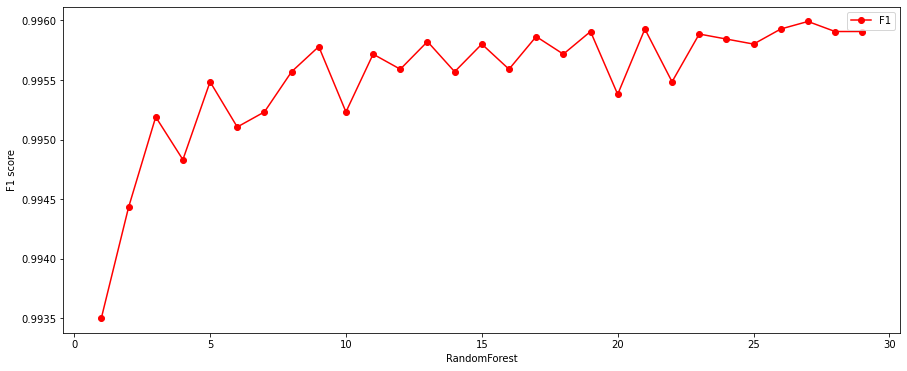

In [78]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

# 컬럼 일부 줄이고 데이터 줄여서 알고리즘 적용

In [31]:
test = geopandas.read_file('./merge_6.geojson', encoding='utf-8')
test = test[['geometry', '인구수', '건축물수', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]
test.head()

,geometry,인구수,건축물수,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",0,1,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",0,1,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",27,4,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",0,3,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",27,20,0,0,0,0,0,0,0,0,0,0


target 데이터 분포

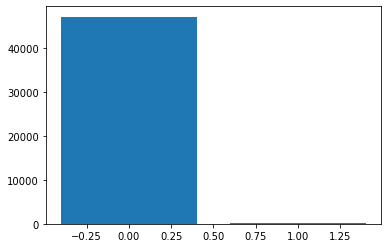

0    0.994177
1    0.005823
Name: EV, dtype: float64


In [15]:
plt.bar([0, 1], material['EV'].value_counts())
plt.show()
print(material['EV'].value_counts()/len(material))

### 앙상블 모델 비교

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data = material[material.columns[1:-1]]
target = material['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

# 1:1 (각 276곳)

In [41]:
######1번:0번 = 1:1 (276곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data_test1 = test[test['EV']==1].reset_index(drop=True)
data_test_0 = test[test['EV']==0].reset_index(drop=True)
data_test0 = data_test_0.sample(n=276, replace=False, random_state=0).reset_index(drop=True)
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

In [43]:
data

,인구수,건축물수,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,181,1,0,0,0,0,0,0,0,0,0
1,529,4,0,0,0,0,0,0,0,0,0
2,134,4,0,0,0,0,0,0,0,0,0
3,19,1,0,0,0,0,0,0,0,0,0
4,208,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,0


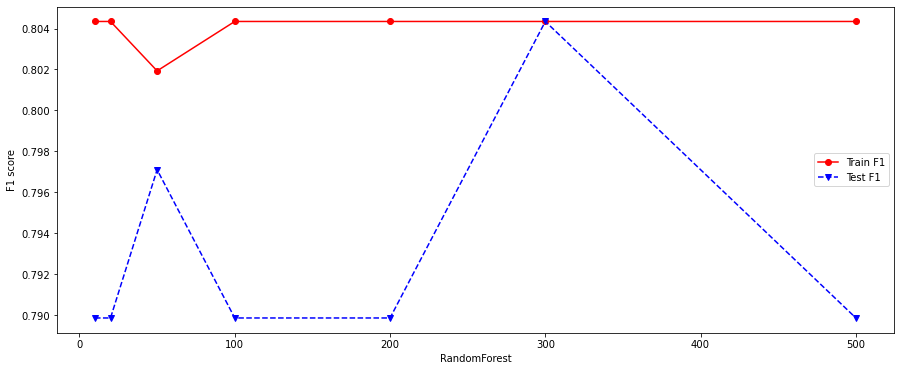

In [56]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [46]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 209
train_set에서 충전소가 없는 곳 : 205
충전소가 있다고 정확히 분류 : 136
충전소가 없는데 있다고 분류 : 8
충전소가 있는데 없다고 분류 : 73

test_set 에서 충전소가 있는 곳 : 67
test_set에서 충전소가 없는 곳 : 71
충전소가 있다고 정확히 분류 : 46
충전소가 없는데 있다고 분류 : 6
충전소가 있는데 없다고 분류 : 21


estimators = 1
충전소가 없는데 있다고 분류 : 24
충전소가 있는데 없다고 분류 : 95 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 101 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 17
충전소가 있는데 없다고 분류 : 94 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 21
충전소가 있는데 없다고 분류 : 90 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 13
충전소가 있는데 없다고 분류 : 93 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 22
충전소가 있는데 없다고 분류 : 85 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 85 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 12
충전소가 있는데 없다고 분류 : 95 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 86 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 11
충전소가 있는데 없다고 분류 : 94 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 86 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 11
충전소가 있는데 없다고 분류 : 94 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 21
충전소가 있는데 없다고 분류 : 85 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 86 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 22
충전소가 있는데 없다고 분류 : 85 / 276

estimators = 16
충전소가 없는데 있다고 분류 :

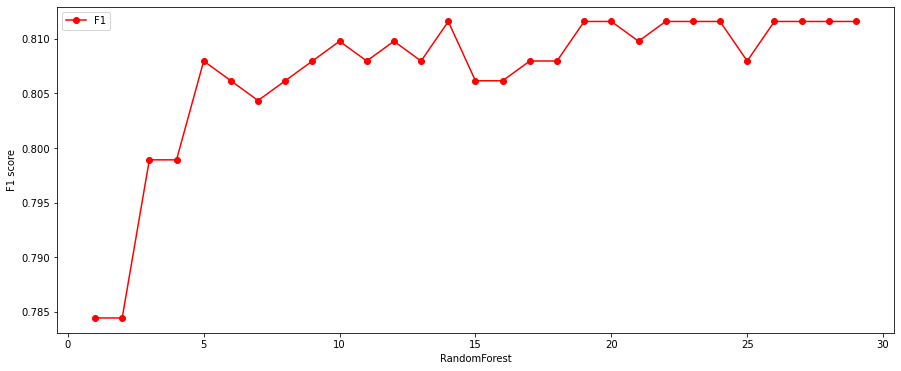

In [35]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) #, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [36]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

충전소가 없는데 있다고 분류 : 19
충전소가 있는데 없다고 분류 : 85 / 276


# 1:0 = 1:1 / 인구수 0인 곳 제거

In [59]:
index1 = test[(test['인구수']==0) & (test['EV']==0)].index
index1

Int64Index([    0,     1,     3,     5,     7,    10,    11,    12,    13,
               15,
            ...
            47386, 47387, 47388, 47389, 47390, 47391, 47392, 47393, 47394,
            47395],
           dtype='int64', length=44005)

In [63]:
test1 = test.drop(index1).reset_index(drop=True)
test1

,geometry,인구수,건축물수,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((980600.00000 1843000.00000, 980600.0...",27,4,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((969300.00000 1857700.00000, 969300.0...",27,20,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((975800.00000 1835000.00000, 975800.0...",379,3,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((975000.00000 1827200.00000, 975000.0...",24,9,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((976900.00000 1834400.00000, 976900.0...",253,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,"POLYGON ((978200.00000 1835300.00000, 978200.0...",0,0,0,0,0,0,0,0,0,0,0,1
3387,"POLYGON ((980700.00000 1831400.00000, 980700.0...",0,0,0,0,0,0,0,0,0,0,0,1
3388,"POLYGON ((978000.00000 1835500.00000, 978000.0...",0,0,0,0,0,0,0,0,0,0,0,1
3389,"POLYGON ((984400.00000 1832500.00000, 984400.0...",0,0,0,0,0,0,0,0,0,0,0,1


# 비율 맞추지 않고 그대로 적용

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data = test1[test1.columns[1:-1]]
target = test1['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

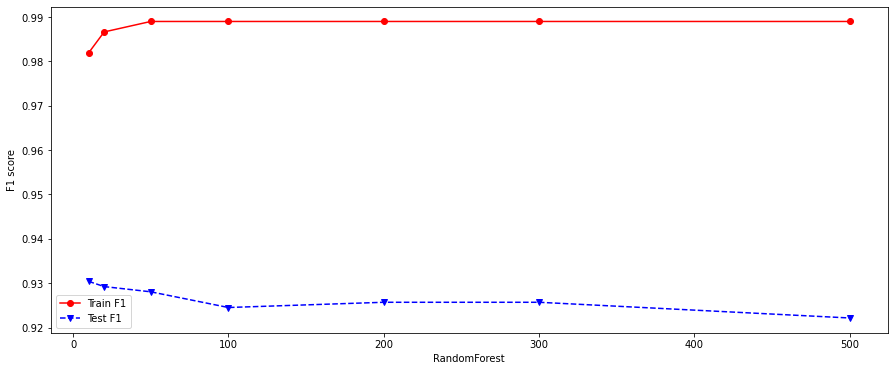

In [80]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [81]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 203
train_set에서 충전소가 없는 곳 : 2340
충전소가 있다고 정확히 분류 : 177
충전소가 없는데 있다고 분류 : 2
충전소가 있는데 없다고 분류 : 26

test_set 에서 충전소가 있는 곳 : 73
test_set에서 충전소가 없는 곳 : 775
충전소가 있다고 정확히 분류 : 39
충전소가 없는데 있다고 분류 : 32
충전소가 있는데 없다고 분류 : 34


estimators = 1
충전소가 없는데 있다고 분류 : 114
충전소가 있는데 없다고 분류 : 44 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 41
충전소가 있는데 없다고 분류 : 77 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 49
충전소가 있는데 없다고 분류 : 49 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 40
충전소가 있는데 없다고 분류 : 66 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 58
충전소가 있는데 없다고 분류 : 38 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 48
충전소가 있는데 없다고 분류 : 55 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 58
충전소가 있는데 없다고 분류 : 29 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 44
충전소가 있는데 없다고 분류 : 43 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 48
충전소가 있는데 없다고 분류 : 41 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 46
충전소가 있는데 없다고 분류 : 48 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 59
충전소가 있는데 없다고 분류 : 29 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 45
충전소가 있는데 없다고 분류 : 35 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 46
충전소가 있는데 없다고 분류 : 25 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 44
충전소가 있는데 없다고 분류 : 37 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 47
충전소가 있는데 없다고 분류 : 27 / 276

estimators = 16
충전소가 없는데 있다고 분류 :

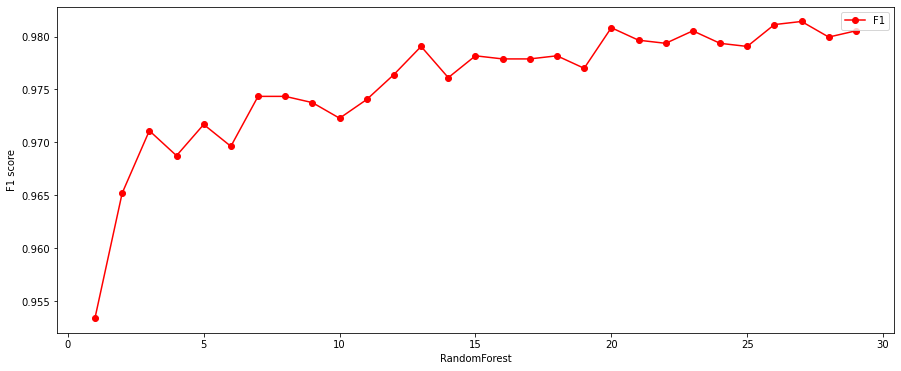

In [82]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [ ]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

# 1:1 비율 적용(random_state=0)

In [83]:
######1번:0번 = 1:1 (276곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data_test1 = test1[test1['EV']==1].reset_index(drop=True)
data_test_0 = test1[test1['EV']==0].reset_index(drop=True)
data_test0 = data_test_0.sample(n=276, replace=False, random_state=0).reset_index(drop=True)
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

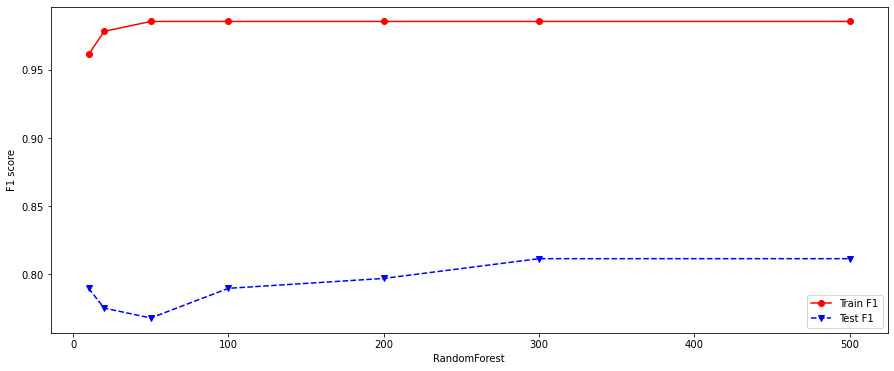

In [84]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [85]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 209
train_set에서 충전소가 없는 곳 : 205
충전소가 있다고 정확히 분류 : 203
충전소가 없는데 있다고 분류 : 0
충전소가 있는데 없다고 분류 : 6

test_set 에서 충전소가 있는 곳 : 67
test_set에서 충전소가 없는 곳 : 71
충전소가 있다고 정확히 분류 : 51
충전소가 없는데 있다고 분류 : 10
충전소가 있는데 없다고 분류 : 16


estimators = 1
충전소가 없는데 있다고 분류 : 35
충전소가 있는데 없다고 분류 : 29 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 14
충전소가 있는데 없다고 분류 : 37 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 27
충전소가 있는데 없다고 분류 : 16 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 22
충전소가 있는데 없다고 분류 : 33 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 27
충전소가 있는데 없다고 분류 : 7 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 16 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 9 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 12
충전소가 있는데 없다고 분류 : 14 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 9 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 17
충전소가 있는데 없다고 분류 : 15 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 7 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 15
충전소가 있는데 없다고 분류 : 6 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 10
충전소가 있는데 없다고 분류 : 7 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 16
충전소가 있는데 없다고 분류 : 9 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 12
충전소가 있는데 없다고 분류 : 7 / 276

estimators = 16
충전소가 없는데 있다고 분류 : 16
충전소가 

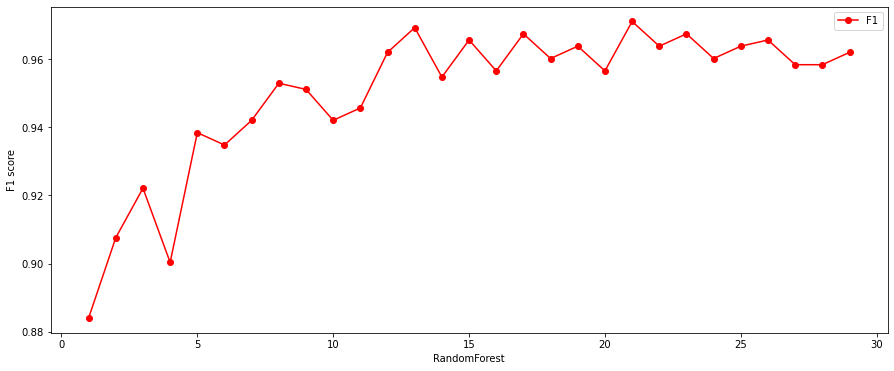

In [86]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [ ]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

# 1:1 비율 적용(random_state=32)

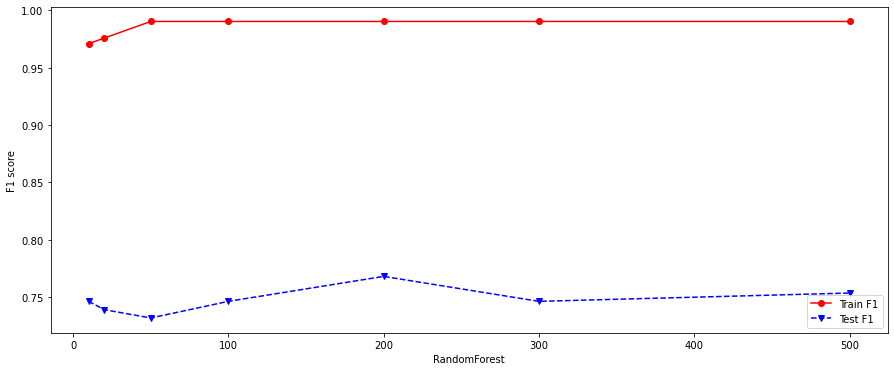

In [100]:
######1번:0번 = 1:1 (276곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data_test1 = test1[test1['EV']==1].reset_index(drop=True)
data_test_0 = test1[test1['EV']==0].reset_index(drop=True)
data_test0 = data_test_0.sample(n=276, replace=False).reset_index(drop=True) #, random_state=32
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)



from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [101]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 209
train_set에서 충전소가 없는 곳 : 205
충전소가 있다고 정확히 분류 : 206
충전소가 없는데 있다고 분류 : 1
충전소가 있는데 없다고 분류 : 3

test_set 에서 충전소가 있는 곳 : 67
test_set에서 충전소가 없는 곳 : 71
충전소가 있다고 정확히 분류 : 53
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 14


estimators = 1
충전소가 없는데 있다고 분류 : 40
충전소가 있는데 없다고 분류 : 21 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 46 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 27
충전소가 있는데 없다고 분류 : 20 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 29 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 24
충전소가 있는데 없다고 분류 : 17 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 12
충전소가 있는데 없다고 분류 : 26 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 27
충전소가 있는데 없다고 분류 : 10 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 17
충전소가 있는데 없다고 분류 : 11 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 25
충전소가 있는데 없다고 분류 : 8 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 13
충전소가 있는데 없다고 분류 : 10 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 6 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 7
충전소가 있는데 없다고 분류 : 16 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 7 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 9
충전소가 있는데 없다고 분류 : 9 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 17
충전소가 있는데 없다고 분류 : 6 / 276

estimators = 16
충전소가 없는데 있다고 분류 : 20
충전소가

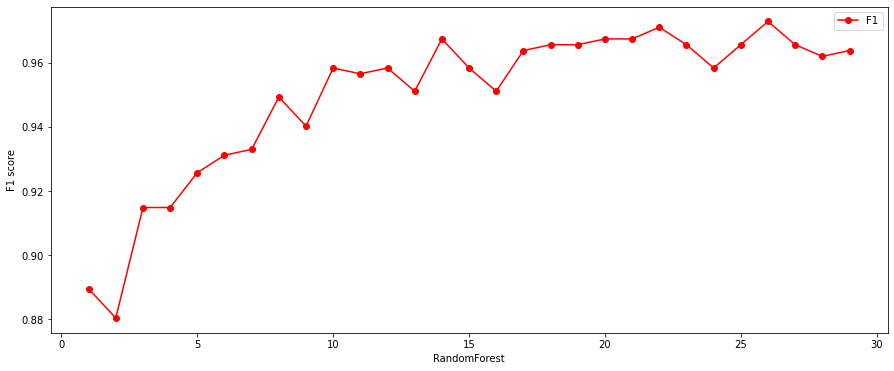

In [102]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [ ]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

# 1:2 비율 적용

In [88]:
######1번:0번 = 1:2 (552곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data_test1 = test1[test1['EV']==1].reset_index(drop=True)
data_test_0 = test1[test1['EV']==0].reset_index(drop=True)
data_test0 = data_test_0.sample(n=552, replace=False, random_state=0).reset_index(drop=True)
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

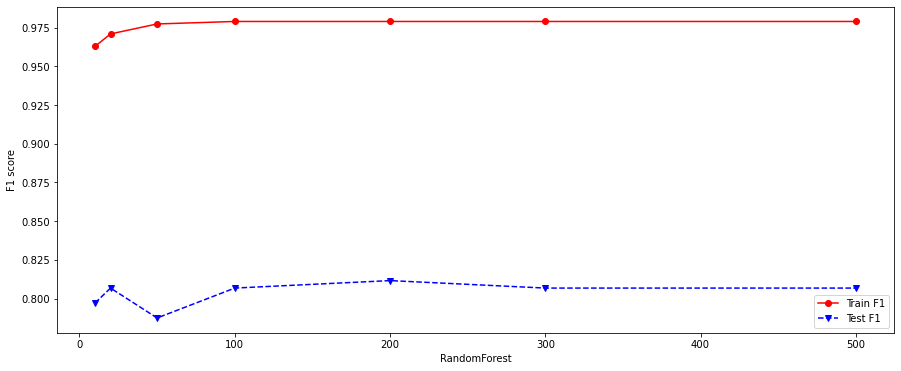

In [89]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [90]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 215
train_set에서 충전소가 없는 곳 : 406
충전소가 있다고 정확히 분류 : 204
충전소가 없는데 있다고 분류 : 2
충전소가 있는데 없다고 분류 : 11

test_set 에서 충전소가 있는 곳 : 61
test_set에서 충전소가 없는 곳 : 146
충전소가 있다고 정확히 분류 : 39
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 22


estimators = 1
충전소가 없는데 있다고 분류 : 69
충전소가 있는데 없다고 분류 : 32 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 14
충전소가 있는데 없다고 분류 : 64 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 31
충전소가 있는데 없다고 분류 : 35 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 34
충전소가 있는데 없다고 분류 : 35 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 34
충전소가 있는데 없다고 분류 : 22 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 24
충전소가 있는데 없다고 분류 : 33 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 19
충전소가 있는데 없다고 분류 : 19 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 21
충전소가 있는데 없다고 분류 : 24 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 27
충전소가 있는데 없다고 분류 : 16 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 27 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 32
충전소가 있는데 없다고 분류 : 20 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 21 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 41
충전소가 있는데 없다고 분류 : 10 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 13 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 24
충전소가 있는데 없다고 분류 : 11 / 276

estimators = 16
충전소가 없는데 있다고 분류 : 

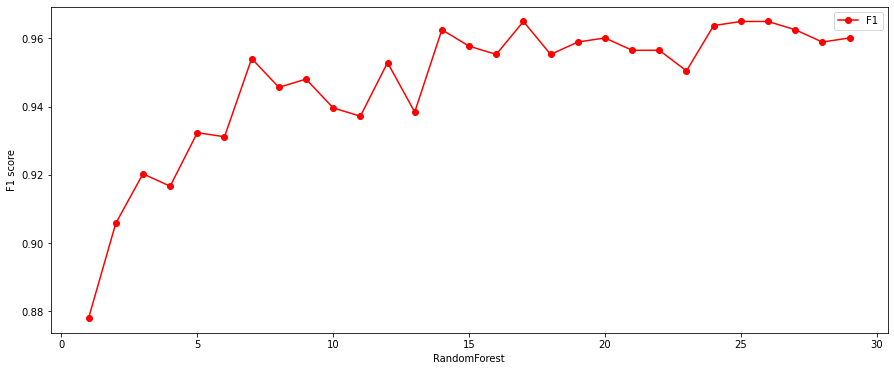

In [91]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [92]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 10 / 276


# 1:3 비율 적용

In [93]:
######1번:0번 = 1:3 (828곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

data_test1 = test1[test1['EV']==1].reset_index(drop=True)
data_test_0 = test1[test1['EV']==0].reset_index(drop=True)
data_test0 = data_test_0.sample(n=828, replace=False, random_state=0).reset_index(drop=True)
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

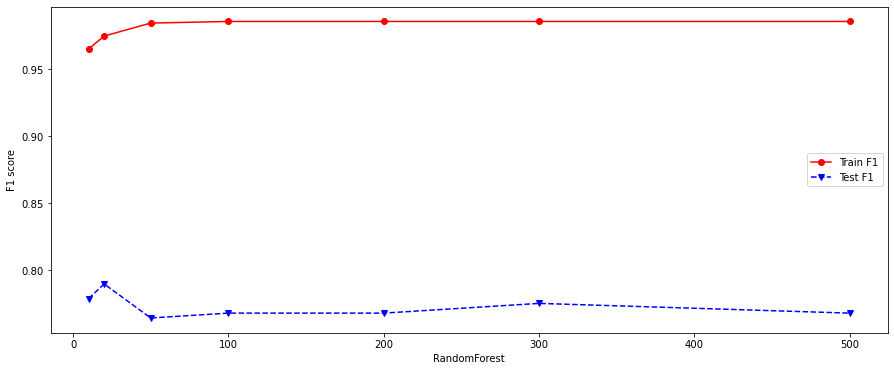

In [94]:
from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = data_train, target_train, data_test, target_test

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [95]:
df_train = data_train.copy()
df_train['EV'] = target_train
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = data_test.copy()
df_test['EV'] = target_test
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 209
train_set에서 충전소가 없는 곳 : 619
충전소가 있다고 정확히 분류 : 198
충전소가 없는데 있다고 분류 : 1
충전소가 있는데 없다고 분류 : 11

test_set 에서 충전소가 있는 곳 : 67
test_set에서 충전소가 없는 곳 : 209
충전소가 있다고 정확히 분류 : 39
충전소가 없는데 있다고 분류 : 36
충전소가 있는데 없다고 분류 : 28


estimators = 1
충전소가 없는데 있다고 분류 : 79
충전소가 있는데 없다고 분류 : 37 / 276

estimators = 2
충전소가 없는데 있다고 분류 : 42
충전소가 있는데 없다고 분류 : 73 / 276

estimators = 3
충전소가 없는데 있다고 분류 : 44
충전소가 있는데 없다고 분류 : 27 / 276

estimators = 4
충전소가 없는데 있다고 분류 : 31
충전소가 있는데 없다고 분류 : 44 / 276

estimators = 5
충전소가 없는데 있다고 분류 : 45
충전소가 있는데 없다고 분류 : 25 / 276

estimators = 6
충전소가 없는데 있다고 분류 : 31
충전소가 있는데 없다고 분류 : 38 / 276

estimators = 7
충전소가 없는데 있다고 분류 : 25
충전소가 있는데 없다고 분류 : 21 / 276

estimators = 8
충전소가 없는데 있다고 분류 : 25
충전소가 있는데 없다고 분류 : 28 / 276

estimators = 9
충전소가 없는데 있다고 분류 : 23
충전소가 있는데 없다고 분류 : 17 / 276

estimators = 10
충전소가 없는데 있다고 분류 : 33
충전소가 있는데 없다고 분류 : 25 / 276

estimators = 11
충전소가 없는데 있다고 분류 : 34
충전소가 있는데 없다고 분류 : 15 / 276

estimators = 12
충전소가 없는데 있다고 분류 : 24
충전소가 있는데 없다고 분류 : 23 / 276

estimators = 13
충전소가 없는데 있다고 분류 : 18
충전소가 있는데 없다고 분류 : 19 / 276

estimators = 14
충전소가 없는데 있다고 분류 : 29
충전소가 있는데 없다고 분류 : 18 / 276

estimators = 15
충전소가 없는데 있다고 분류 : 38
충전소가 있는데 없다고 분류 : 23 / 276

estimators = 16
충전소가 없는데 있다고 분류 : 

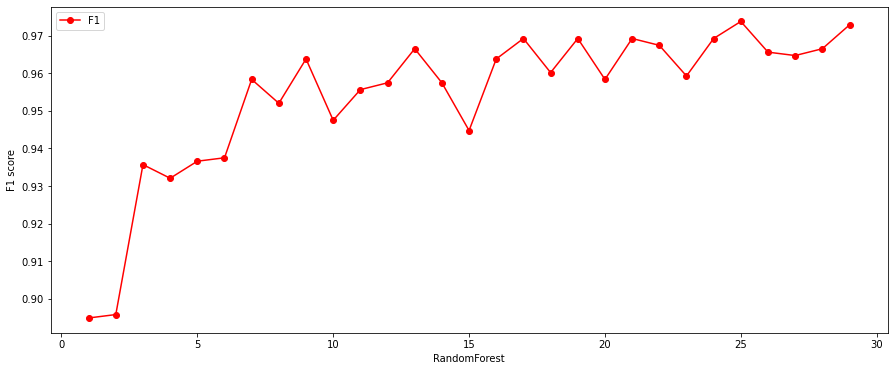

In [96]:
from sklearn import ensemble

F1 = []

numBaseClassifiers = range(1, 30, 1)

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, class_weight={0:1, 1:9}) # class_wei ght={0:1, 1:9}
    clf.fit(data, target)
    Y_pred = clf.predict(data)
    F1.append(f1_score(target, Y_pred, average='micro'))
    
    df = data.copy()
    df['EV'] = target
    df['pred'] = Y_pred
    df.head()

    print("estimators =", k)
    print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
    print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))
    print()
    

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, F1, 'ro-')
plt.legend(['F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [97]:
df = data.copy()
df['EV'] = target
df['pred'] = Y_pred
df.head()

print("충전소가 없는데 있다고 분류 :", len(df[(df['EV'] == 0) & (df['pred'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df[(df['EV'] == 1) & (df['pred'] == 0)]), "/", len(df[(df['EV'] == 1)]))

충전소가 없는데 있다고 분류 : 20
충전소가 있는데 없다고 분류 : 10 / 276
